In [1]:
import data_gen
%matplotlib inline

Gungsuh not found
Batang not found
Dotum not found
SM SSMyungJo Std not found
Gulim not found
NanumGothicCoding not found
Please provide above fonts.
==Target fonts==
NanumMyeongjo
NanumGothic
Are you sure to proceed? (y/n)n
Aborting..


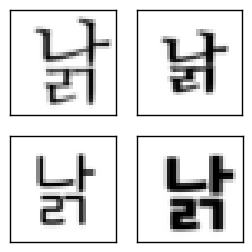

In [3]:
data_gen.generate_fonts("data/test.tgz", 300000, plot=True, force=False)